In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Read in 2023 dataset and merge with webscraped data

df_2023 = pd.read_csv('data/SHIFTS (2).csv')

df_2022 = pd.read_csv('data/shift_details.csv')

In [3]:
df_2023.head()

,ObjectID,DATE1,DAY_OF_WEEK,AGENCY_DESC,SITE_NAME,TOWN,WATERBODY,FNAME,LNAME,INSPECTOR_ID,...,SHIFT_LENGTH,TRAILERS,TOTAL_NM,TOTAL_M,TOTALINSP,COMMENTS,NUMINVASIVE,GlobalID,x,y
0,71,5/12/2023,Fri,FOCW (Friends of the Cobbossee Watershed),Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,Emily,Lucas,5305,...,190,2.0,0.0,5,5.0,\r\n,0.0,2efd8f58-5a9e-4b75-8e56-4cb720b404ab,-69.96728,44.23825
1,87,5/15/2023,Mon,FOCW (Friends of the Cobbossee Watershed),Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,Jo,Parker,5582,...,177,3.0,1.0,4,5.0,NaN,0.0,79e8dad7-953c-44ea-a755-5ae798d88a0e,-69.96728,44.23825
2,140,5/26/2023,Fri,FOCW (Friends of the Cobbossee Watershed),Whippoorwill Road,Litchfield,Woodbury Pond,Georgia,Howe,5714,...,420,3.0,0.0,12,12.0,NaN,0.0,0e7817d3-1b58-4126-b74e-63633c56c9b7,-69.93623,44.21212
3,148,5/26/2023,Fri,FOCW (Friends of the Cobbossee Watershed),Norcross Point South Basin Maranacook,Winthrop,Maranacook Lake,Jasper,Balano-Stott,4174,...,315,0.0,0.0,8,8.0,NaN,0.0,fc2638c6-255b-4dd4-8a07-dfbaa8243f64,-69.97390,44.31010
4,149,5/26/2023,Fri,FOCW (Friends of the Cobbossee Watershed),Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,Steve,Lambert,5670,...,420,4.0,0.0,31,31.0,NaN,0.0,2ae48858-7783-465d-8b28-a1f2b4eaa446,-69.96728,44.23825


In [4]:
df_2022.head()

,SITE_NAME,DATE,DAY,INSPECTOR_ID,PAID,START_SHIFT,END_SHIFT,INSPECTIONS,TOTALINSP,NUMINVASIVE
0,Augusta West Kampground,08/15/2021,Sun,4769,Paid,08:00,18:00,Yes,13,NaN
1,Launch Drive,08/15/2021,Sun,3796,Paid,07:00,17:00,Yes,95,NaN
2,Old Kents Hill Road,08/15/2021,Sun,5006,Paid,13:00,19:00,Yes,4,NaN
3,Wilson Pond Road,08/15/2021,Sun,4174,Paid,13:00,19:00,Yes,15,NaN
4,Rt 41 North Basin Maranacook,08/15/2021,Sun,5353,Paid,13:00,19:00,Yes,32,NaN


In [5]:
df_2022.shape

(1642, 10)

In [6]:
df_2023.shape

(984, 23)

In [7]:
df_2022.isna().sum()

SITE_NAME         0
DATE              0
DAY               0
INSPECTOR_ID      0
PAID              0
START_SHIFT       0
END_SHIFT         0
INSPECTIONS       0
TOTALINSP         0
NUMINVASIVE     671
dtype: int64

In [8]:
df_2023.isna().sum()

ObjectID          0
DATE1             0
DAY_OF_WEEK       0
AGENCY_DESC       0
SITE_NAME         0
TOWN              0
WATERBODY         0
FNAME             0
LNAME             0
INSPECTOR_ID      0
PAY_VOL           0
SHIFT_START       0
SHIFT_END         0
SHIFT_LENGTH      0
TRAILERS        178
TOTAL_NM          2
TOTAL_M           0
TOTALINSP         2
COMMENTS        896
NUMINVASIVE       1
GlobalID          0
x                 0
y                 0
dtype: int64

## Data Cleaning Steps


#### I need to drop the columns from 2023 that i don't have info for in 2022 & 2021
- ObjectId?
- FNAME
- LNAME
- TOTAL_NM
- TOTAL_M
- TRAILERS
- GLOBAL_ID
- x
- y
- COMMENTS

#### I need to rename columns in webscraped data:
- START_SHIFT: SHIFT_START
- END_SHIFT: SHIFT_END
- PAID: PAY_VOL
- DATE: DATE1
- DAY: DAY_OF_WEEK

#### Data Cleaning df_2022:
- I need to fill in the values for town, waterbody using df_2023
- Create the shift length column from shift_start and shift_end


#### Concatenate 2 dataframes then more cleaning
- Create a new column of just month? 
- Drop if site = Lakeside Marina Cobbosseecontee
- Drop NUM_INVASIVE or fill with 0s? (won't be used to predict number of inspections anyway...?)

#### Dropping unecessary columns from 2023 data

In [11]:
# ObjectId, FNAME, LNAME, TOTAL_NM, TOTAL_M, TRAILERS, GLOBAL_ID, x, y, COMMENTS
df_2023 = df_2023.drop(columns = ['ObjectID', 'FNAME', 'LNAME', 'TOTAL_NM', 'TOTAL_M', 'TRAILERS', 'GlobalID', 'x', 'y', 'COMMENTS'])

In [13]:
df_2023.shape

(984, 13)

#### Renaming columns from 2021 and 2022 data to match 2023 df

In [14]:
df_2022 = df_2022.rename(columns = {'START_SHIFT' : 'SHIFT_START', 'END_SHIFT': 'SHIFT_END', 'PAID': 'PAY_VOL', 'DATE': 'DATE1', 'DAY': 'DAY_OF_WEEK'})

In [15]:
df_2023.head(1)

,DATE1,DAY_OF_WEEK,AGENCY_DESC,SITE_NAME,TOWN,WATERBODY,INSPECTOR_ID,PAY_VOL,SHIFT_START,SHIFT_END,SHIFT_LENGTH,TOTALINSP,NUMINVASIVE
0,5/12/2023,Fri,FOCW (Friends of the Cobbossee Watershed),Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,5305,Paid,08:50,12:00,190,5.0,0.0


#### Using Site Names to create Waterbody and Town columns in 2021/ 2022 data

In [25]:
result = df_2023.groupby('SITE_NAME')['TOWN'].unique()
result

SITE_NAME
Beach Road                                 [Monmouth]
East Winthrop Cobbosseecontee              [Winthrop]
Holmes Road Annabessacook                  [Winthrop]
Lakeside Marina Cobbosseecontee            [Winthrop]
Launch Drive Cobbosseecontee               [Monmouth]
Norcross Point South Basin Maranacook      [Winthrop]
Old Kents Hill Road                       [Readfield]
Rt 41 North Basin Maranacook              [Readfield]
Thorofare Rd                             [Litchfield]
Whippoorwill Road                        [Litchfield]
Wilson Pond Road                           [Monmouth]
Name: TOWN, dtype: object

In [ ]:
df_2022.head()

In [41]:
# Create a dictionary using the matching towns for each site_name in the 2023 data 
# Some sites were referred to differently in past years ie Launch Drive Cobbosseecontee = Launch Drive
# Augusta West Kampground = Holmes Road

site_town_dictionary = {'SITE_NAME': 'TOWN',
                        'Beach Road': 'Monmouth',
                        'East Winthrop Cobbosseecontee': 'Winthrop',
                        'East Winthrop': 'Winthrop',
                        'Holmes Road Annabessacook': 'Winthrop',
                        'Augusta West Kampground': 'Winthrop',
                        'Lakeside Marina Cobbosseecontee': 'Winthrop',
                        'Launch Drive Cobbosseecontee': 'Monmouth',
                        'Launch Drive': 'Launch Drive',
                        'Norcross Point South Basin Maranacook': 'Winthrop',
                        'Old Kents Hill Road': 'Readfield',
                        'Rt 41 North Basin Maranacook': 'Readfield',
                        'Thorofare Rd': 'Litchfield',
                        'Whippoorwill Road': 'Litchfield',
                        'Wilson Pond Road': 'Monmouth'}

In [44]:
df_2022['TOWN'] = df_2022['SITE_NAME'].map(site_town_dictionary)
df_2022.head(1)

,SITE_NAME,DATE1,DAY_OF_WEEK,INSPECTOR_ID,PAY_VOL,SHIFT_START,SHIFT_END,INSPECTIONS,TOTALINSP,NUMINVASIVE,TOWN
0,Augusta West Kampground,08/15/2021,Sun,4769,Paid,08:00,18:00,Yes,13,NaN,Winthrop


In [43]:
df_2022[df_2022['TOWN'].isna()]

,SITE_NAME,DATE1,DAY_OF_WEEK,INSPECTOR_ID,PAY_VOL,SHIFT_START,SHIFT_END,INSPECTIONS,TOTALINSP,NUMINVASIVE,TOWN


In [45]:
result = df_2023.groupby('SITE_NAME')['WATERBODY'].unique()
result

SITE_NAME
Beach Road                                   [Cochnewagon Pond]
East Winthrop Cobbosseecontee            [Cobbosseecontee Lake]
Holmes Road Annabessacook                  [Annabessacook Lake]
Lakeside Marina Cobbosseecontee          [Cobbosseecontee Lake]
Launch Drive Cobbosseecontee             [Cobbosseecontee Lake]
Norcross Point South Basin Maranacook         [Maranacook Lake]
Old Kents Hill Road                               [Torsey Lake]
Rt 41 North Basin Maranacook                  [Maranacook Lake]
Thorofare Rd                                    [Pleasant Pond]
Whippoorwill Road                               [Woodbury Pond]
Wilson Pond Road                                  [Wilson Pond]
Name: WATERBODY, dtype: object

In [46]:
site_waterbody_dictionary = {'SITE_NAME': 'WATERBODY',
                        'Beach Road': 'Cochnewagon Pond',
                        'East Winthrop Cobbosseecontee': 'Cobbosseecontee Lake',
                        'East Winthrop': 'Cobbosseecontee Lake',
                        'Holmes Road Annabessacook': 'Annabessacook Lake',
                        'Augusta West Kampground': 'Annabessacook Lake',
                        'Lakeside Marina Cobbosseecontee': 'Cobbosseecontee Lake',
                        'Launch Drive Cobbosseecontee': 'Cobbosseecontee Lake',
                        'Launch Drive': 'Cobbosseecontee Lake',
                        'Norcross Point South Basin Maranacook': 'Maranacook Lake',
                        'Old Kents Hill Road': 'Torsey Lake',
                        'Rt 41 North Basin Maranacook': 'Maranacook Lake',
                        'Thorofare Rd': 'Pleasant Pond',
                        'Whippoorwill Road': 'Woodbury Pond',
                        'Wilson Pond Road': 'Wilson Pond'}

In [47]:
df_2022['WATERBODY'] = df_2022['SITE_NAME'].map(site_waterbody_dictionary)
df_2022.head(1)

,SITE_NAME,DATE1,DAY_OF_WEEK,INSPECTOR_ID,PAY_VOL,SHIFT_START,SHIFT_END,INSPECTIONS,TOTALINSP,NUMINVASIVE,TOWN,WATERBODY
0,Augusta West Kampground,08/15/2021,Sun,4769,Paid,08:00,18:00,Yes,13,NaN,Winthrop,Annabessacook Lake


In [48]:
df_2022[df_2022['WATERBODY'].isna()]

,SITE_NAME,DATE1,DAY_OF_WEEK,INSPECTOR_ID,PAY_VOL,SHIFT_START,SHIFT_END,INSPECTIONS,TOTALINSP,NUMINVASIVE,TOWN,WATERBODY


#### Create a shift_length column for 2021/ 2022 data using SHIFT_START and SHIFT_END

In [49]:
df_2023.head(3)

,DATE1,DAY_OF_WEEK,AGENCY_DESC,SITE_NAME,TOWN,WATERBODY,INSPECTOR_ID,PAY_VOL,SHIFT_START,SHIFT_END,SHIFT_LENGTH,TOTALINSP,NUMINVASIVE
0,5/12/2023,Fri,FOCW (Friends of the Cobbossee Watershed),Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,5305,Paid,08:50,12:00,190,5.0,0.0
1,5/15/2023,Mon,FOCW (Friends of the Cobbossee Watershed),Launch Drive Cobbosseecontee,Monmouth,Cobbosseecontee Lake,5582,Paid,09:03,12:00,177,5.0,0.0
2,5/26/2023,Fri,FOCW (Friends of the Cobbossee Watershed),Whippoorwill Road,Litchfield,Woodbury Pond,5714,Paid,12:00,19:00,420,12.0,0.0


In [50]:
df_2023.dtypes
# Shift_start and shift_end are currently object types and must be converted to datetime in order to be subtracted

DATE1            object
DAY_OF_WEEK      object
AGENCY_DESC      object
SITE_NAME        object
TOWN             object
WATERBODY        object
INSPECTOR_ID      int64
PAY_VOL          object
SHIFT_START      object
SHIFT_END        object
SHIFT_LENGTH      int64
TOTALINSP       float64
NUMINVASIVE     float64
dtype: object

In [56]:
# Since the resulting shift_length would be a datetime, I can find the total seconds then divide by 60 for the resulting shift_length in minutes
df_2022['SHIFT_LENGTH'] = (pd.to_datetime(df_2022['SHIFT_END'], format='%H:%M') - pd.to_datetime(df_2022['SHIFT_START'], format='%H:%M')).dt.total_seconds() / 60

In [57]:
df_2022.head()

,SITE_NAME,DATE1,DAY_OF_WEEK,INSPECTOR_ID,PAY_VOL,SHIFT_START,SHIFT_END,INSPECTIONS,TOTALINSP,NUMINVASIVE,TOWN,WATERBODY,SHIFT_LENGTH
0,Augusta West Kampground,08/15/2021,Sun,4769,Paid,08:00,18:00,Yes,13,NaN,Winthrop,Annabessacook Lake,600.0
1,Launch Drive,08/15/2021,Sun,3796,Paid,07:00,17:00,Yes,95,NaN,Launch Drive,Cobbosseecontee Lake,600.0
2,Old Kents Hill Road,08/15/2021,Sun,5006,Paid,13:00,19:00,Yes,4,NaN,Readfield,Torsey Lake,360.0
3,Wilson Pond Road,08/15/2021,Sun,4174,Paid,13:00,19:00,Yes,15,NaN,Monmouth,Wilson Pond,360.0
4,Rt 41 North Basin Maranacook,08/15/2021,Sun,5353,Paid,13:00,19:00,Yes,32,NaN,Readfield,Maranacook Lake,360.0


In [84]:
shift_df = pd.concat([df_2022, df_2023], axis=0, ignore_index=True)
shift_df.head()

,SITE_NAME,DATE1,DAY_OF_WEEK,INSPECTOR_ID,PAY_VOL,SHIFT_START,SHIFT_END,INSPECTIONS,TOTALINSP,NUMINVASIVE,TOWN,WATERBODY,SHIFT_LENGTH,AGENCY_DESC
0,Augusta West Kampground,08/15/2021,Sun,4769,Paid,08:00,18:00,Yes,13.0,NaN,Winthrop,Annabessacook Lake,600.0,NaN
1,Launch Drive,08/15/2021,Sun,3796,Paid,07:00,17:00,Yes,95.0,NaN,Launch Drive,Cobbosseecontee Lake,600.0,NaN
2,Old Kents Hill Road,08/15/2021,Sun,5006,Paid,13:00,19:00,Yes,4.0,NaN,Readfield,Torsey Lake,360.0,NaN
3,Wilson Pond Road,08/15/2021,Sun,4174,Paid,13:00,19:00,Yes,15.0,NaN,Monmouth,Wilson Pond,360.0,NaN
4,Rt 41 North Basin Maranacook,08/15/2021,Sun,5353,Paid,13:00,19:00,Yes,32.0,NaN,Readfield,Maranacook Lake,360.0,NaN


In [85]:
shift_df.shape

(2626, 14)

In [86]:
# What does it mean if inspections = No? Does that just mean no inspections took place or would that be indicative of a different type of shift?
shift_df.INSPECTIONS.value_counts()

Yes    1572
No       70
Name: INSPECTIONS, dtype: int64

In [87]:
# Convert 'date1' to datetime
shift_df['DATE'] = pd.to_datetime(shift_df['DATE1'], format='%m/%d/%Y')

# Create 'month' and 'year' columns
shift_df['month'] = shift_df['DATE'].dt.month
shift_df['year'] = shift_df['DATE'].dt.year

In [88]:
shift_df.head()

,SITE_NAME,DATE1,DAY_OF_WEEK,INSPECTOR_ID,PAY_VOL,SHIFT_START,SHIFT_END,INSPECTIONS,TOTALINSP,NUMINVASIVE,TOWN,WATERBODY,SHIFT_LENGTH,AGENCY_DESC,DATE,month,year
0,Augusta West Kampground,08/15/2021,Sun,4769,Paid,08:00,18:00,Yes,13.0,NaN,Winthrop,Annabessacook Lake,600.0,NaN,2021-08-15,8,2021
1,Launch Drive,08/15/2021,Sun,3796,Paid,07:00,17:00,Yes,95.0,NaN,Launch Drive,Cobbosseecontee Lake,600.0,NaN,2021-08-15,8,2021
2,Old Kents Hill Road,08/15/2021,Sun,5006,Paid,13:00,19:00,Yes,4.0,NaN,Readfield,Torsey Lake,360.0,NaN,2021-08-15,8,2021
3,Wilson Pond Road,08/15/2021,Sun,4174,Paid,13:00,19:00,Yes,15.0,NaN,Monmouth,Wilson Pond,360.0,NaN,2021-08-15,8,2021
4,Rt 41 North Basin Maranacook,08/15/2021,Sun,5353,Paid,13:00,19:00,Yes,32.0,NaN,Readfield,Maranacook Lake,360.0,NaN,2021-08-15,8,2021


In [89]:
shift_df[(shift_df['year'] == 2023) & (shift_df['TOTALINSP']==0)].head()

,SITE_NAME,DATE1,DAY_OF_WEEK,INSPECTOR_ID,PAY_VOL,SHIFT_START,SHIFT_END,INSPECTIONS,TOTALINSP,NUMINVASIVE,TOWN,WATERBODY,SHIFT_LENGTH,AGENCY_DESC,DATE,month,year
1711,Launch Drive Cobbosseecontee,6/4/2023,Sun,5727,Paid,07:00,19:00,NaN,0.0,0.0,Monmouth,Cobbosseecontee Lake,720.0,FOCW (Friends of the Cobbossee Watershed),2023-06-04,6,2023
1712,Wilson Pond Road,6/4/2023,Sun,5982,Paid,07:00,13:00,NaN,0.0,0.0,Monmouth,Wilson Pond,360.0,FOCW (Friends of the Cobbossee Watershed),2023-06-04,6,2023
1716,East Winthrop Cobbosseecontee,6/4/2023,Sun,5987,Paid,13:00,19:00,NaN,0.0,0.0,Winthrop,Cobbosseecontee Lake,360.0,FOCW (Friends of the Cobbossee Watershed),2023-06-04,6,2023
1718,Beach Road,6/4/2023,Sun,5968,Paid,13:00,19:00,NaN,0.0,0.0,Monmouth,Cochnewagon Pond,360.0,FOCW (Friends of the Cobbossee Watershed),2023-06-04,6,2023
1721,Norcross Point South Basin Maranacook,6/4/2023,Sun,5980,Paid,13:00,19:00,NaN,0.0,0.0,Winthrop,Maranacook Lake,360.0,FOCW (Friends of the Cobbossee Watershed),2023-06-04,6,2023


In [90]:
# I can drop agency desc and inspections
shift_df.drop(columns=['AGENCY_DESC', 'INSPECTIONS'], inplace=True)

In [91]:
shift_df.head()

,SITE_NAME,DATE1,DAY_OF_WEEK,INSPECTOR_ID,PAY_VOL,SHIFT_START,SHIFT_END,TOTALINSP,NUMINVASIVE,TOWN,WATERBODY,SHIFT_LENGTH,DATE,month,year
0,Augusta West Kampground,08/15/2021,Sun,4769,Paid,08:00,18:00,13.0,NaN,Winthrop,Annabessacook Lake,600.0,2021-08-15,8,2021
1,Launch Drive,08/15/2021,Sun,3796,Paid,07:00,17:00,95.0,NaN,Launch Drive,Cobbosseecontee Lake,600.0,2021-08-15,8,2021
2,Old Kents Hill Road,08/15/2021,Sun,5006,Paid,13:00,19:00,4.0,NaN,Readfield,Torsey Lake,360.0,2021-08-15,8,2021
3,Wilson Pond Road,08/15/2021,Sun,4174,Paid,13:00,19:00,15.0,NaN,Monmouth,Wilson Pond,360.0,2021-08-15,8,2021
4,Rt 41 North Basin Maranacook,08/15/2021,Sun,5353,Paid,13:00,19:00,32.0,NaN,Readfield,Maranacook Lake,360.0,2021-08-15,8,2021


In [70]:
shift_df.shape

(2626, 15)

In [71]:
shift_df.SITE_NAME.value_counts()

Launch Drive Cobbosseecontee             426
Lakeside Marina Cobbosseecontee          346
East Winthrop Cobbosseecontee            343
Old Kents Hill Road                      260
Whippoorwill Road                        179
Thorofare Rd                             164
Rt 41 North Basin Maranacook             148
Beach Road                               135
Wilson Pond Road                         134
Launch Drive                             132
Norcross Point South Basin Maranacook    130
Augusta West Kampground                  111
East Winthrop                             63
Holmes Road Annabessacook                 55
Name: SITE_NAME, dtype: int64

In [92]:
shift_df = shift_df[shift_df['SITE_NAME'] != 'Lakeside Marina Cobbosseecontee'].copy()
shift_df.shape

(2280, 15)

In [74]:
shift_df.head()

,SITE_NAME,DATE1,DAY_OF_WEEK,INSPECTOR_ID,PAY_VOL,SHIFT_START,SHIFT_END,TOTALINSP,NUMINVASIVE,TOWN,WATERBODY,SHIFT_LENGTH,DATE,month,year
0,Augusta West Kampground,08/15/2021,Sun,4769,Paid,08:00,18:00,13.0,NaN,Winthrop,Annabessacook Lake,600.0,2021-08-15,8,2021
1,Launch Drive,08/15/2021,Sun,3796,Paid,07:00,17:00,95.0,NaN,Launch Drive,Cobbosseecontee Lake,600.0,2021-08-15,8,2021
2,Old Kents Hill Road,08/15/2021,Sun,5006,Paid,13:00,19:00,4.0,NaN,Readfield,Torsey Lake,360.0,2021-08-15,8,2021
3,Wilson Pond Road,08/15/2021,Sun,4174,Paid,13:00,19:00,15.0,NaN,Monmouth,Wilson Pond,360.0,2021-08-15,8,2021
4,Rt 41 North Basin Maranacook,08/15/2021,Sun,5353,Paid,13:00,19:00,32.0,NaN,Readfield,Maranacook Lake,360.0,2021-08-15,8,2021


In [75]:
shift_df.isna().sum()

SITE_NAME         0
DATE1             0
DAY_OF_WEEK       0
INSPECTOR_ID      0
PAY_VOL           0
SHIFT_START       0
SHIFT_END         0
TOTALINSP         2
NUMINVASIVE     672
TOWN              0
WATERBODY         0
SHIFT_LENGTH      0
DATE              0
month             0
year              0
dtype: int64

In [93]:
shift_df.fillna(0, inplace=True)

In [ ]:
shift_df.head()

In [95]:
shift_df.isna().sum()

SITE_NAME       0
DATE1           0
DAY_OF_WEEK     0
INSPECTOR_ID    0
PAY_VOL         0
SHIFT_START     0
SHIFT_END       0
TOTALINSP       0
NUMINVASIVE     0
TOWN            0
WATERBODY       0
SHIFT_LENGTH    0
DATE            0
month           0
year            0
dtype: int64

#### Binarize PAY_VOL column

In [109]:
shift_df['PAY_VOL'] = np.where(shift_df['PAY_VOL'] == 'Paid', 1, 0)

In [110]:
shift_df.head()

,SITE_NAME,DATE1,DAY_OF_WEEK,INSPECTOR_ID,PAY_VOL,SHIFT_START,SHIFT_END,TOTALINSP,NUMINVASIVE,TOWN,WATERBODY,SHIFT_LENGTH,DATE,month,year
489,Launch Drive,05/28/2021,Fri,4771,1,12:00,18:00,33.0,0.0,Launch Drive,Cobbosseecontee Lake,360.0,2021-05-28,5,2021
488,East Winthrop,05/28/2021,Fri,4485,1,12:00,18:00,2.0,0.0,Winthrop,Cobbosseecontee Lake,360.0,2021-05-28,5,2021
487,Augusta West Kampground,05/28/2021,Fri,4769,1,12:00,18:00,1.0,0.0,Winthrop,Annabessacook Lake,360.0,2021-05-28,5,2021
486,Whippoorwill Road,05/28/2021,Fri,4174,1,12:00,18:00,13.0,0.0,Litchfield,Woodbury Pond,360.0,2021-05-28,5,2021
485,Thorofare Rd,05/29/2021,Sat,4944,1,07:00,17:00,11.0,0.0,Litchfield,Pleasant Pond,600.0,2021-05-29,5,2021


In [111]:
shift_df.to_csv('data/shift_details.csv', index=False)

In [ ]:
plt.figure(figsize=(10,6))

# Line plot of Open.
plt.plot(shift_df['Open'], c='lightgray', label='AAPL Open Price')

# Line plot of the 30-day rolling mean of Open.
plt.plot(df['Open'].rolling(30).mean(), c='navy', label='30-day Rolling Mean')
plt.plot(df['Open'].rolling(7).mean(), c='darkred', label='7-day Rolling Mean')
plt.legend();

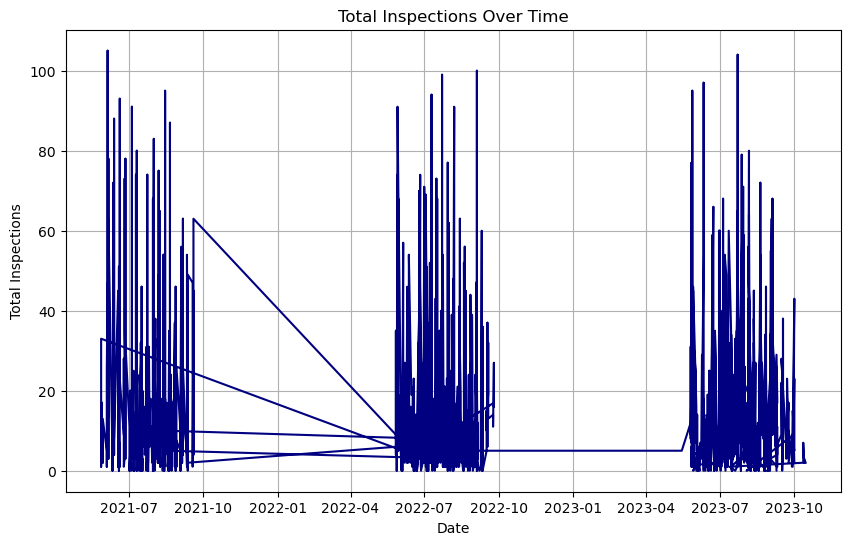

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(shift_df['DATE'], shift_df['TOTALINSP'], c='navy', linestyle='-')
plt.title('Total Inspections Over Time')
plt.xlabel('Date')
plt.ylabel('Total Inspections')
plt.grid(True)
plt.show()

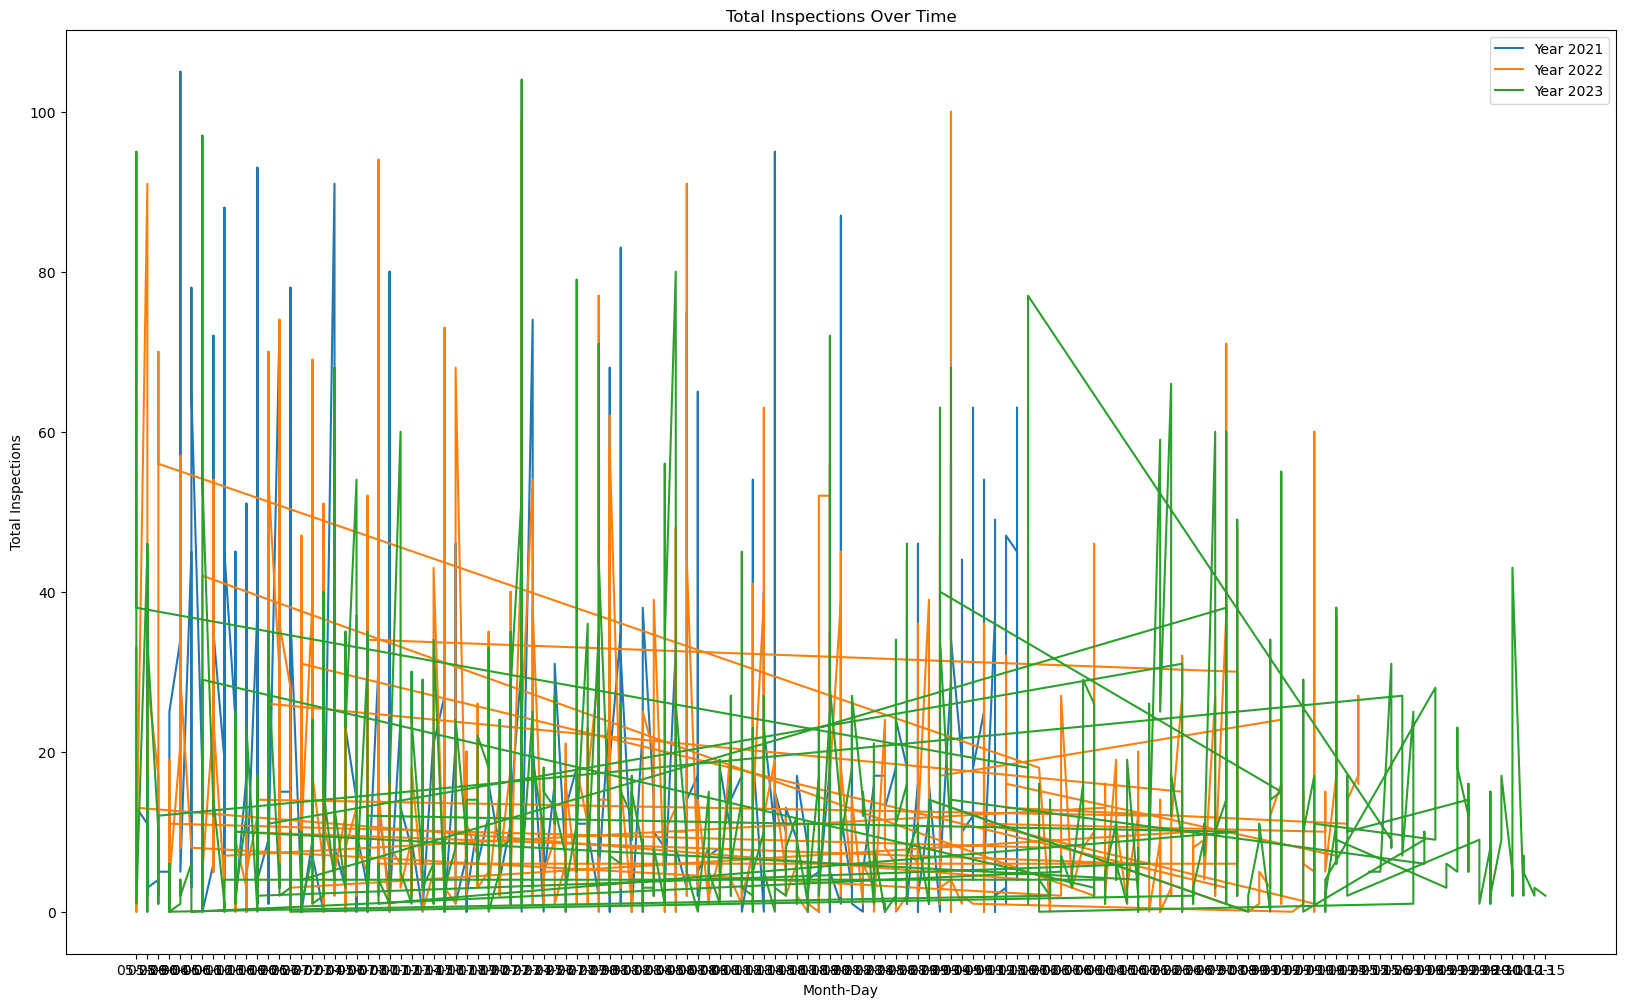

In [100]:
plt.figure(figsize=(20, 12))

shift_df.sort_values('DATE', inplace=True)

for year in shift_df['DATE'].dt.year.unique():
    subset_df = shift_df[shift_df['DATE'].dt.year == year]
    plt.plot(subset_df['DATE'].dt.strftime('%m-%d'), subset_df['TOTALINSP'], label=f'Year {year}')

plt.title('Total Inspections Over Time')
plt.xlabel('Month-Day')
plt.ylabel('Total Inspections')
plt.legend()
plt.show()

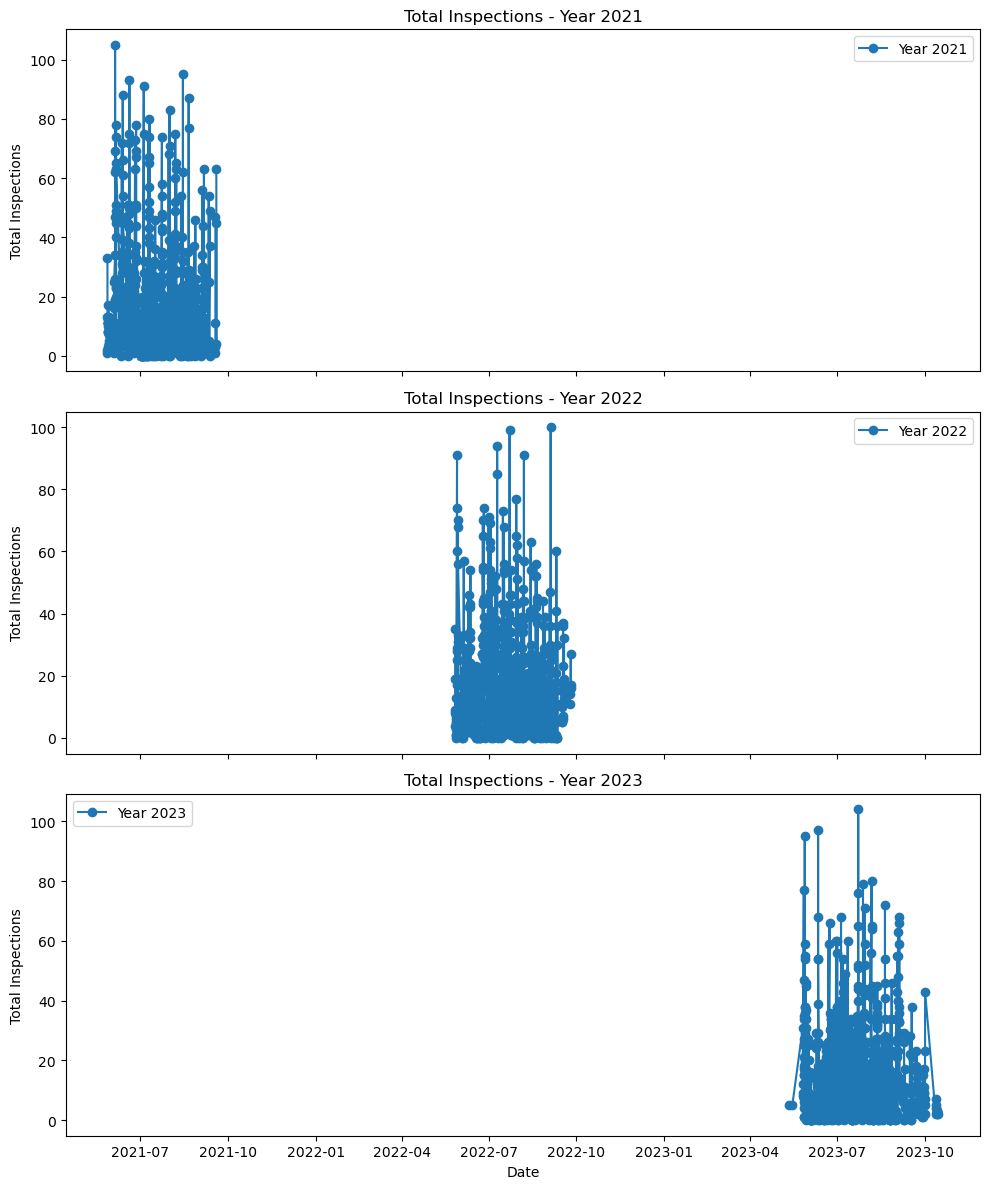

In [101]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)

years = shift_df['DATE'].dt.year.unique()

for i, year in enumerate(years):
    subset_df = shift_df[shift_df['DATE'].dt.year == year]
    axes[i].plot(subset_df['DATE'], subset_df['TOTALINSP'], marker='o', linestyle='-', label=f'Year {year}')
    axes[i].set_title(f'Total Inspections - Year {year}')
    axes[i].set_ylabel('Total Inspections')
    axes[i].legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [102]:
shift_df_2021= shift_df[shift_df['year']==2021]
shift_df_2022= shift_df[shift_df['year']==2023]
shift_df_2023= shift_df[shift_df['year']==2023]

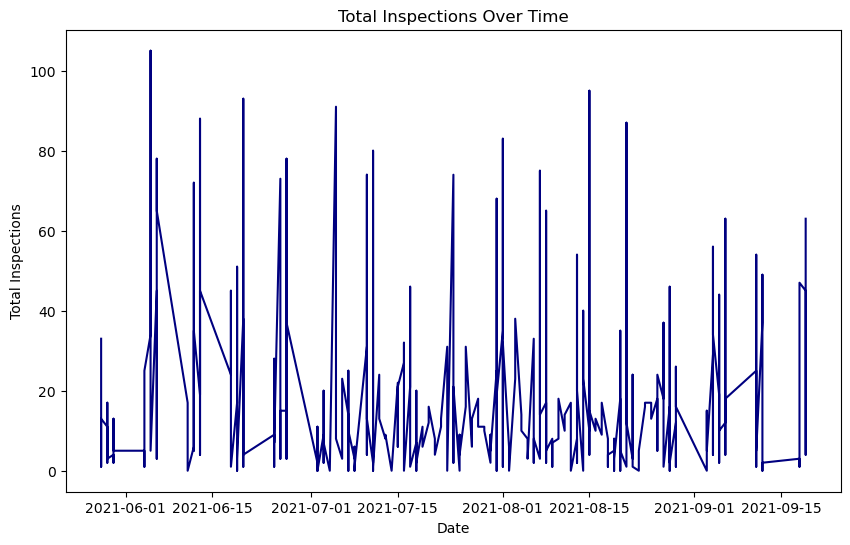

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(shift_df_2021['DATE'], shift_df_2021['TOTALINSP'], c='navy', linestyle='-')
plt.title('Total Inspections Over Time')
plt.xlabel('Date')
plt.ylabel('Total Inspections')
plt.show()

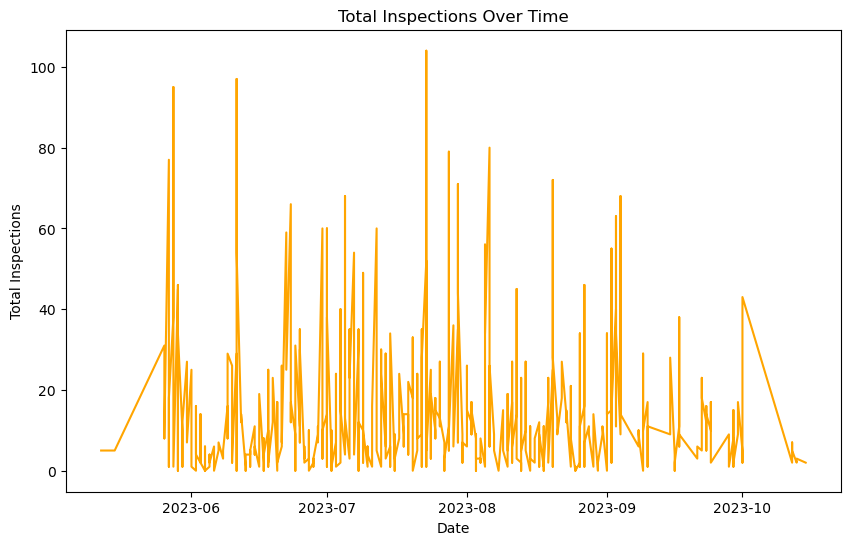

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(shift_df_2022['DATE'], shift_df_2022['TOTALINSP'], c='orange', linestyle='-')
plt.title('Total Inspections Over Time')
plt.xlabel('Date')
plt.ylabel('Total Inspections')
plt.show()

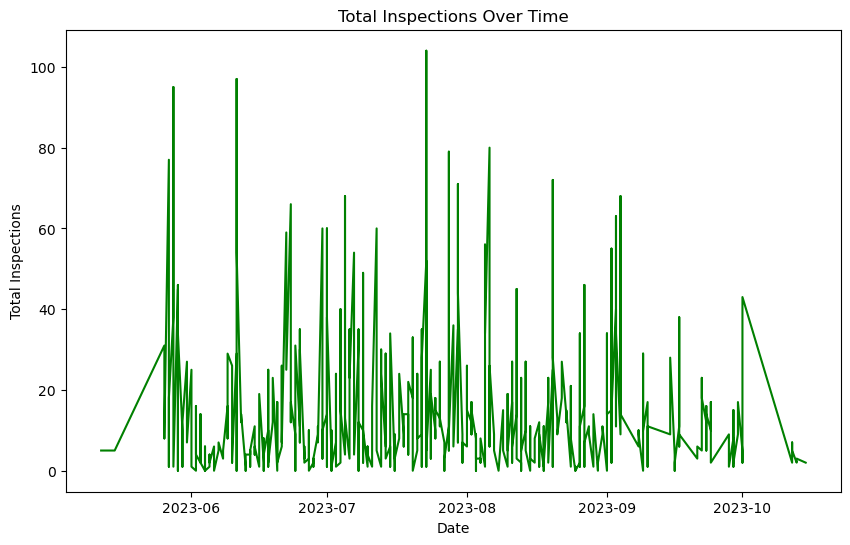

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(shift_df_2022['DATE'], shift_df_2022['TOTALINSP'], c='green', linestyle='-')
plt.title('Total Inspections Over Time')
plt.xlabel('Date')
plt.ylabel('Total Inspections')
plt.show()

In [ ]:
# Separate the data into weeks and months and create bar charts by month and by week?

In [ ]:
plt.

## EDA Goals/ Brainstorming:

### EDA Goals:
- Which are the busiest sites?
- Which are the busiest times of year?
- Which are the busiest days of the week?
- Do different inspectors have different average numbers of inspections? (Is this due to where they are usually assigned?)


### Brainstorming

Which are the busiest sites?

All of the Cobbosseecontee sites are very busy (lakeside is its own thing).


What about individual inspectors?
- Mean inspections of inspectors
- Main or most frequent locations of inspectors
- Are inspectors partnered up or on their own?


What are the main goals of EDA:
- Determine the peak season
- Determine the busiest sites
- Identify days during peak season at busiest sites without a shift & count number of occurrences 


Once I have data from past years:
- What was the expected number of inspections per day?
- 


### Data Goals:

Model Goals:
-Predict number of inspections per shift 2024
-Predict number of fragments per shift 2024
-Predict number of shifts/ hours for 2024

Budget Forecasting:
-Multiply the expected average wage by the expected number of hours


### Possibilities?
- Create a budget function
    - Estimate the number of returning inspectors
    - Estimate the total number of inspectors/ hours at each wage rate
    - Estimate total number of inspectors/ hours
    - Multiply and add
    - Consider overhead and management
- Model the number of fragments
- Model the number of inspections